# **Mengukur Performa Penjualan Ritel Online**

Homework Rakamin Trial Class - Mini Case

Oleh : Adrian Dwi Adinata

Deskripsi : Data yang berisi semua transaksi yang terjadi di tahun 2009-2011. Diminta untuk menganalisis bagaimana performa penjualan dalam kurun waktu 3 tahun terakhir.  

Attributes

●	Invoice		: Nomor invoice 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'C', itu menunjukkan pembatalan.

●	StockCode	: Kode produk (barang). Angka 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda.

●	Description	: Nama produk.

●	Quantity	: Jumlah kuantitas setiap produk per transaksi.

●	InvoiceDate	: Tanggal dan waktu invoice, yakni hari dan waktu saat transaksi dibuat.

●	UnitPrice	: Harga satuan atau harga produk per unit dalam sterling (£).

●	CustomerID	: Nomor 5 digit yang ditetapkan secara unik untuk setiap pelanggan.

●	Country	: Nama negara tempat tinggal pelanggan.


## **Load Data**

Import Library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

Mengakses Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Mendapatkan dataset dari berkas CSV lalu menampilkannya 5 data teratas sebagai dataframe

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Menampilkan 5 data paling bawah

In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [9]:
df.sample()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
736998,555383,21122,SET/10 PINK POLKADOT PARTY CANDLES,6,2011-06-02 15:13:00,1.25,12517.0,Germany


In [6]:
display(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Dari dataframe tersebut, dapat diketahui jumlah baris dan kolom yang terdapat pada dataset yaitu sebanyak 1067371 baris dengan 8 kolom.

In [7]:
print('Total Baris:', df.shape[0])
print('Total Kolom:', df.shape[1])

Total Baris: 1067371
Total Kolom: 8


Menampilkan informasi mengenai kolom-kolom pada dataframe:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [10]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [11]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

## **Section 1: Menganalisis Rata-Rata Pendapatan Per Tahun**


### Create New Feature : Year

Buat kolom baru dengan nama Year yang berisi nilai tahun dari InvoiceDate. Tipe data kolom InvoiceDate perlu diubah menjadi tipe ‘datetime’.

In [13]:
df['Year'] = pd.DatetimeIndex(pd.to_datetime(df['InvoiceDate'])).year
display(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

- Quantity minimal 1 (tidak boleh 0 dan minus)

- Kolom Invoice tidak mengandung huruf ‘C’ karena hal tersebut menandakan pelanggan tidak menyelesaikan belanjanya atau melakukan pembatalan.

In [16]:
sales = df[(df['Quantity'] > 0) & (df['Invoice'].str.contains('C') == False)]
display(sales)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price:

In [17]:
sales = sales.copy()
sales['Revenue'] = sales['Quantity'] * sales['Price']
display(sales)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [20]:
avg_revenue = sales.groupby('Year')['Revenue'].mean()
print('Yearly Average Revenue:\n', avg_revenue)

Yearly Average Revenue:
 Year
2009    18.713273
2010    19.908987
2011    20.058767
Name: Revenue, dtype: float64


Visualisasi

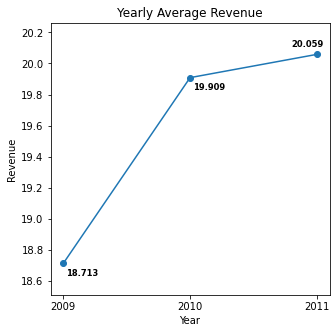

In [22]:
avg_revenue.plot(
    title = 'Yearly Average Revenue',
    xlabel = 'Year',
    ylabel = 'Revenue',
    marker = 'o',
    figsize = (5, 5),
    xticks = avg_revenue.index
)
# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in avg_revenue.items():
    if a != max(avg_revenue.index):
        pos = (a+.02, b-.08)
    else:
        pos = (a-.2, b+.05)
    plt.text(a, b, round(b, 3), position=pos, fontsize='small', fontweight='bold')
plt.margins(.05, .15)
plt.show()

### Interpretation

Dari grafik hasil perhitungan rata-rata pendapatan per tahun diatas, dapat diketahui bahwa terjadi kenaikan setiap tahunnya. Terjadi peningkatan yang sangat pesat pada tahun 2010. Namun peningkatan pada tahun 2011 tidak sebesar seperti sebelumnya.

## **Section 2: Menganalisis Transaksi Pelanggan Per Tahun**

### Filtering Data 

#### Customers who finished their purchases

Lakukan filtering menggunakan data sales (data yang sudah di filter pada section 1) dengan ketentuan CustomerID tidak boleh kosong atau null. Kemudian simpan dalam variabel finished.

In [24]:
finished = sales[sales['Customer ID'].notna()]
display(finished)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

Filtering data untuk mengelompokkan pelanggan yang membatalkan belanjanya, dengan cara mendeteksi kolom Invoice yang mengandung huruf ‘C’.

In [26]:
cancel = df[df['Invoice'].str.contains('C')]
display(cancel)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [29]:
finished_yearly = finished.groupby('Year').size()
canceled_yearly = cancel.groupby('Year').size()
yearly_transaction = pd.concat([finished_yearly, canceled_yearly], axis=1, keys=['Finished', 'Canceled'])
display(yearly_transaction)

,Finished,Canceled
Year,,
2009,30761,1015
2010,403094,9919
2011,371765,8560


Visualisasi

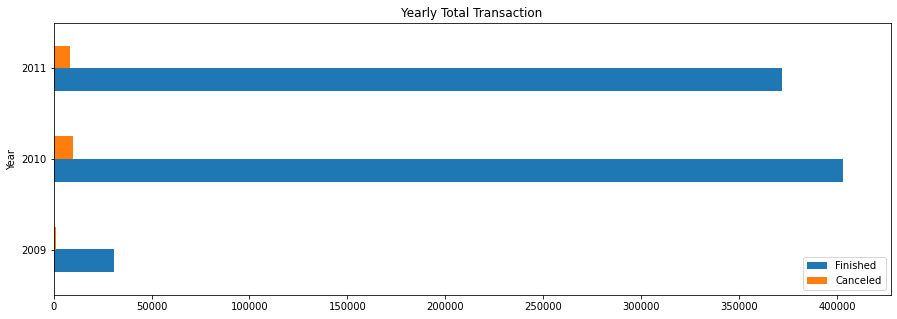

In [38]:
ax = yearly_transaction.plot.barh(
    title = 'Yearly Total Transaction',
    xlabel = 'Year',
    ylabel = 'Transaction',
    figsize = (15, 5)
)

plt.margins(.06)
plt.legend(loc='lower right')
plt.show()

### Cancellation Rate

Cancellation rate adalah persentase pelanggan yang melakukan pembatalan pesanan yang telah dilakukan. Formulanya adalah jumlah pelanggan yang membatalkan pesanan dibagi dengan jumlah seluruh pelanggan kemudian dikali 100%.

In [41]:
cancel_rate = cancel.groupby('Year')['Customer ID'].nunique()
customer_total = df.groupby('Year')['Customer ID'].nunique()
yearly_cr = pd.concat([customer_total, cancel_rate, ], axis=1, keys=['Total Customer', 'Cancel'])
yearly_cr['Rate'] = yearly_cr['Cancel'] / yearly_cr['Total Customer'] * 100
display(yearly_cr)

,Total Customer,Cancel,Rate
Year,,,
2009,1045,309,29.569378
2010,4289,1730,40.335743
2011,4244,1494,35.202639


Visualisasi

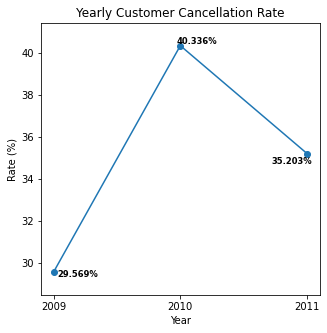

In [44]:
yearly_cr['Rate'].plot(
    title = 'Yearly Customer Cancellation Rate',
    xlabel = 'Year',
    ylabel = 'Rate (%)',
    marker = 'o',
    figsize = (5, 5),
    xticks = yearly_cr.index
)
# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in yearly_cr['Rate'].items():
    if a != max(yearly_cr.index):
      if b != max(yearly_cr['Rate']):
        pos = (a+.03, b-.2)
      else:
        pos = (a-.03, b+.1)
    else:
        pos = (a-.28, b-.5)
    plt.text(a, b, str(round(b, 3)) + '%', position=pos, fontsize='small', fontweight='bold')
plt.margins(.05, .1)
plt.show()

Jika interpretasi cancellation rate adalah berdasarkan persentase transaksi yang dibatalkan, maka hasil perhitungannya adalah sebagai berikut:

In [45]:
trans_cancel = cancel.groupby('Year').size()
trans_total = df.groupby('Year').size()
yearly_cr_trans = pd.concat([trans_total, trans_cancel], axis=1, keys=['Total', 'Cancel'])
yearly_cr_trans['Rate'] = yearly_cr_trans['Cancel'] / yearly_cr_trans['Total'] * 100
display(yearly_cr_trans)

,Total,Cancel,Rate
Year,,,
2009,45228,1015,2.244185
2010,522714,9919,1.897596
2011,499429,8560,1.713957


Visualisasi hasil perhitungan cancellation rate berdasarkan jumlah transaksi:

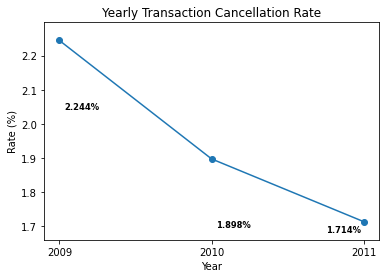

In [47]:
yearly_cr_trans['Rate'].plot(
    title='Yearly Transaction Cancellation Rate',
    xlabel='Year',
    ylabel='Rate (%)',
    marker='o',
    figsize=(6,4),
    xticks=yearly_cr_trans.index
)

# Jika data berubah maka posisi harus disesuaikan lagi
for a, b in yearly_cr_trans['Rate'].items():
    if a != max(yearly_cr_trans.index):
        pos = (a+.03, b-.2)
    else:
        pos = (a-.25, b-.03)
    plt.text(a, b, str(round(b, 3)) + '%', position=pos, fontsize='small', fontweight='bold')

plt.margins(.05, .1)
plt.show()

### Interpretation

Dari grafik yang ditunjukkan di atas dapat terlihat bahwa terjadi peningkatan pesat jumlah transaksi pada tahun 2010 baik transaksi yang berhasil maupun transaksi yang dibatalkan. Setelah itu terjadi penurunan pada tahun berikutnya (2011).

Hal serupa juga dapat terlihat pada grafik customer cancellation rate. Namun jika dilakukan perhitungan cancellation rate berdasarkan jumlah transaksi, ditemukan bahwa persentasenya semakin menurun tiap tahunnya. Saat ditinjau kembali perubahan antara jumlah transaksi yang berhasil dengan yang dibatalkan setiap tahunnya, masih terlihat pola yang sama yaitu terjadi peningkatan pesat pada tahun 2010 dan kembali menurun pada tahun 2011.